In [ ]:
import pandas as pd
import keras
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import h5py
import tensorflow as tf
from sklearn.metrics import mean_squared_error 
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rc('font', size= 45)          # controls default text sizes
plt.rc('axes', titlesize= 45)     # fontsize of the axes title
plt.rc('axes', labelsize=45)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=45)    # fontsize of the tick labels
plt.rc('ytick', labelsize=45)    # fontsize of the tick labels
plt.rc('legend', fontsize=45)    # legend fontsize
plt.rc('figure', titlesize=45)  # fontsize of the figure title
from pylab import rcParams
rcParams['figure.figsize'] = 35,30

In [ ]:
df = pd.read_excel("DSTrains.xlsx", index_col=0)
dataset = df.values
X = dataset[:,1:4]
Y = dataset[:,-2]
model = keras.models.Sequential()
model.add(keras.layers.Dense(200, activation='relu', input_shape=(3,)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss=tf.keras.losses.MeanAbsolutePercentageError())


In [ ]:
hist = model.fit(X, Y,batch_size=50, epochs=10000, validation_data=(X,Y))

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 61ms/step - loss: 1.4887 - val_loss: 1.6609
Epoch 7502/10000
1/1 [==============================] - 0s 58ms/step - loss: 1.6609 - val_loss: 1.2153
Epoch 7503/10000
1/1 [==============================] - 0s 226ms/step - loss: 1.2153 - val_loss: 1.9544
Epoch 7504/10000
1/1 [==============================] - 0s 59ms/step - loss: 1.9544 - val_loss: 2.1245
Epoch 7505/10000
1/1 [==============================] - 0s 60ms/step - loss: 2.1245 - val_loss: 1.6938
Epoch 7506/10000
1/1 [==============================] - 0s 84ms/step - loss: 1.6938 - val_loss: 2.9390
Epoch 7507/10000
1/1 [==============================] - 0s 60ms/step - loss: 2.9390 - val_loss: 2.4761
Epoch 7508/10000
1/1 [==============================] - 0s 60ms/step - loss: 2.4761 - val_loss: 1.9418
Epoch 7509/10000
1/1 [==============================] - 0s 57ms/step - loss: 1.9418 - val_loss: 2.4413
Epoch 7510/10000
1/1 

In [ ]:
df = pd.read_excel("DSTest.xlsx", index_col=0)
dataset = df.values
X = dataset[:,1:4]
Y = dataset[:,-2]

In [ ]:
y_pred = model.predict(X)

0.016464543604978215


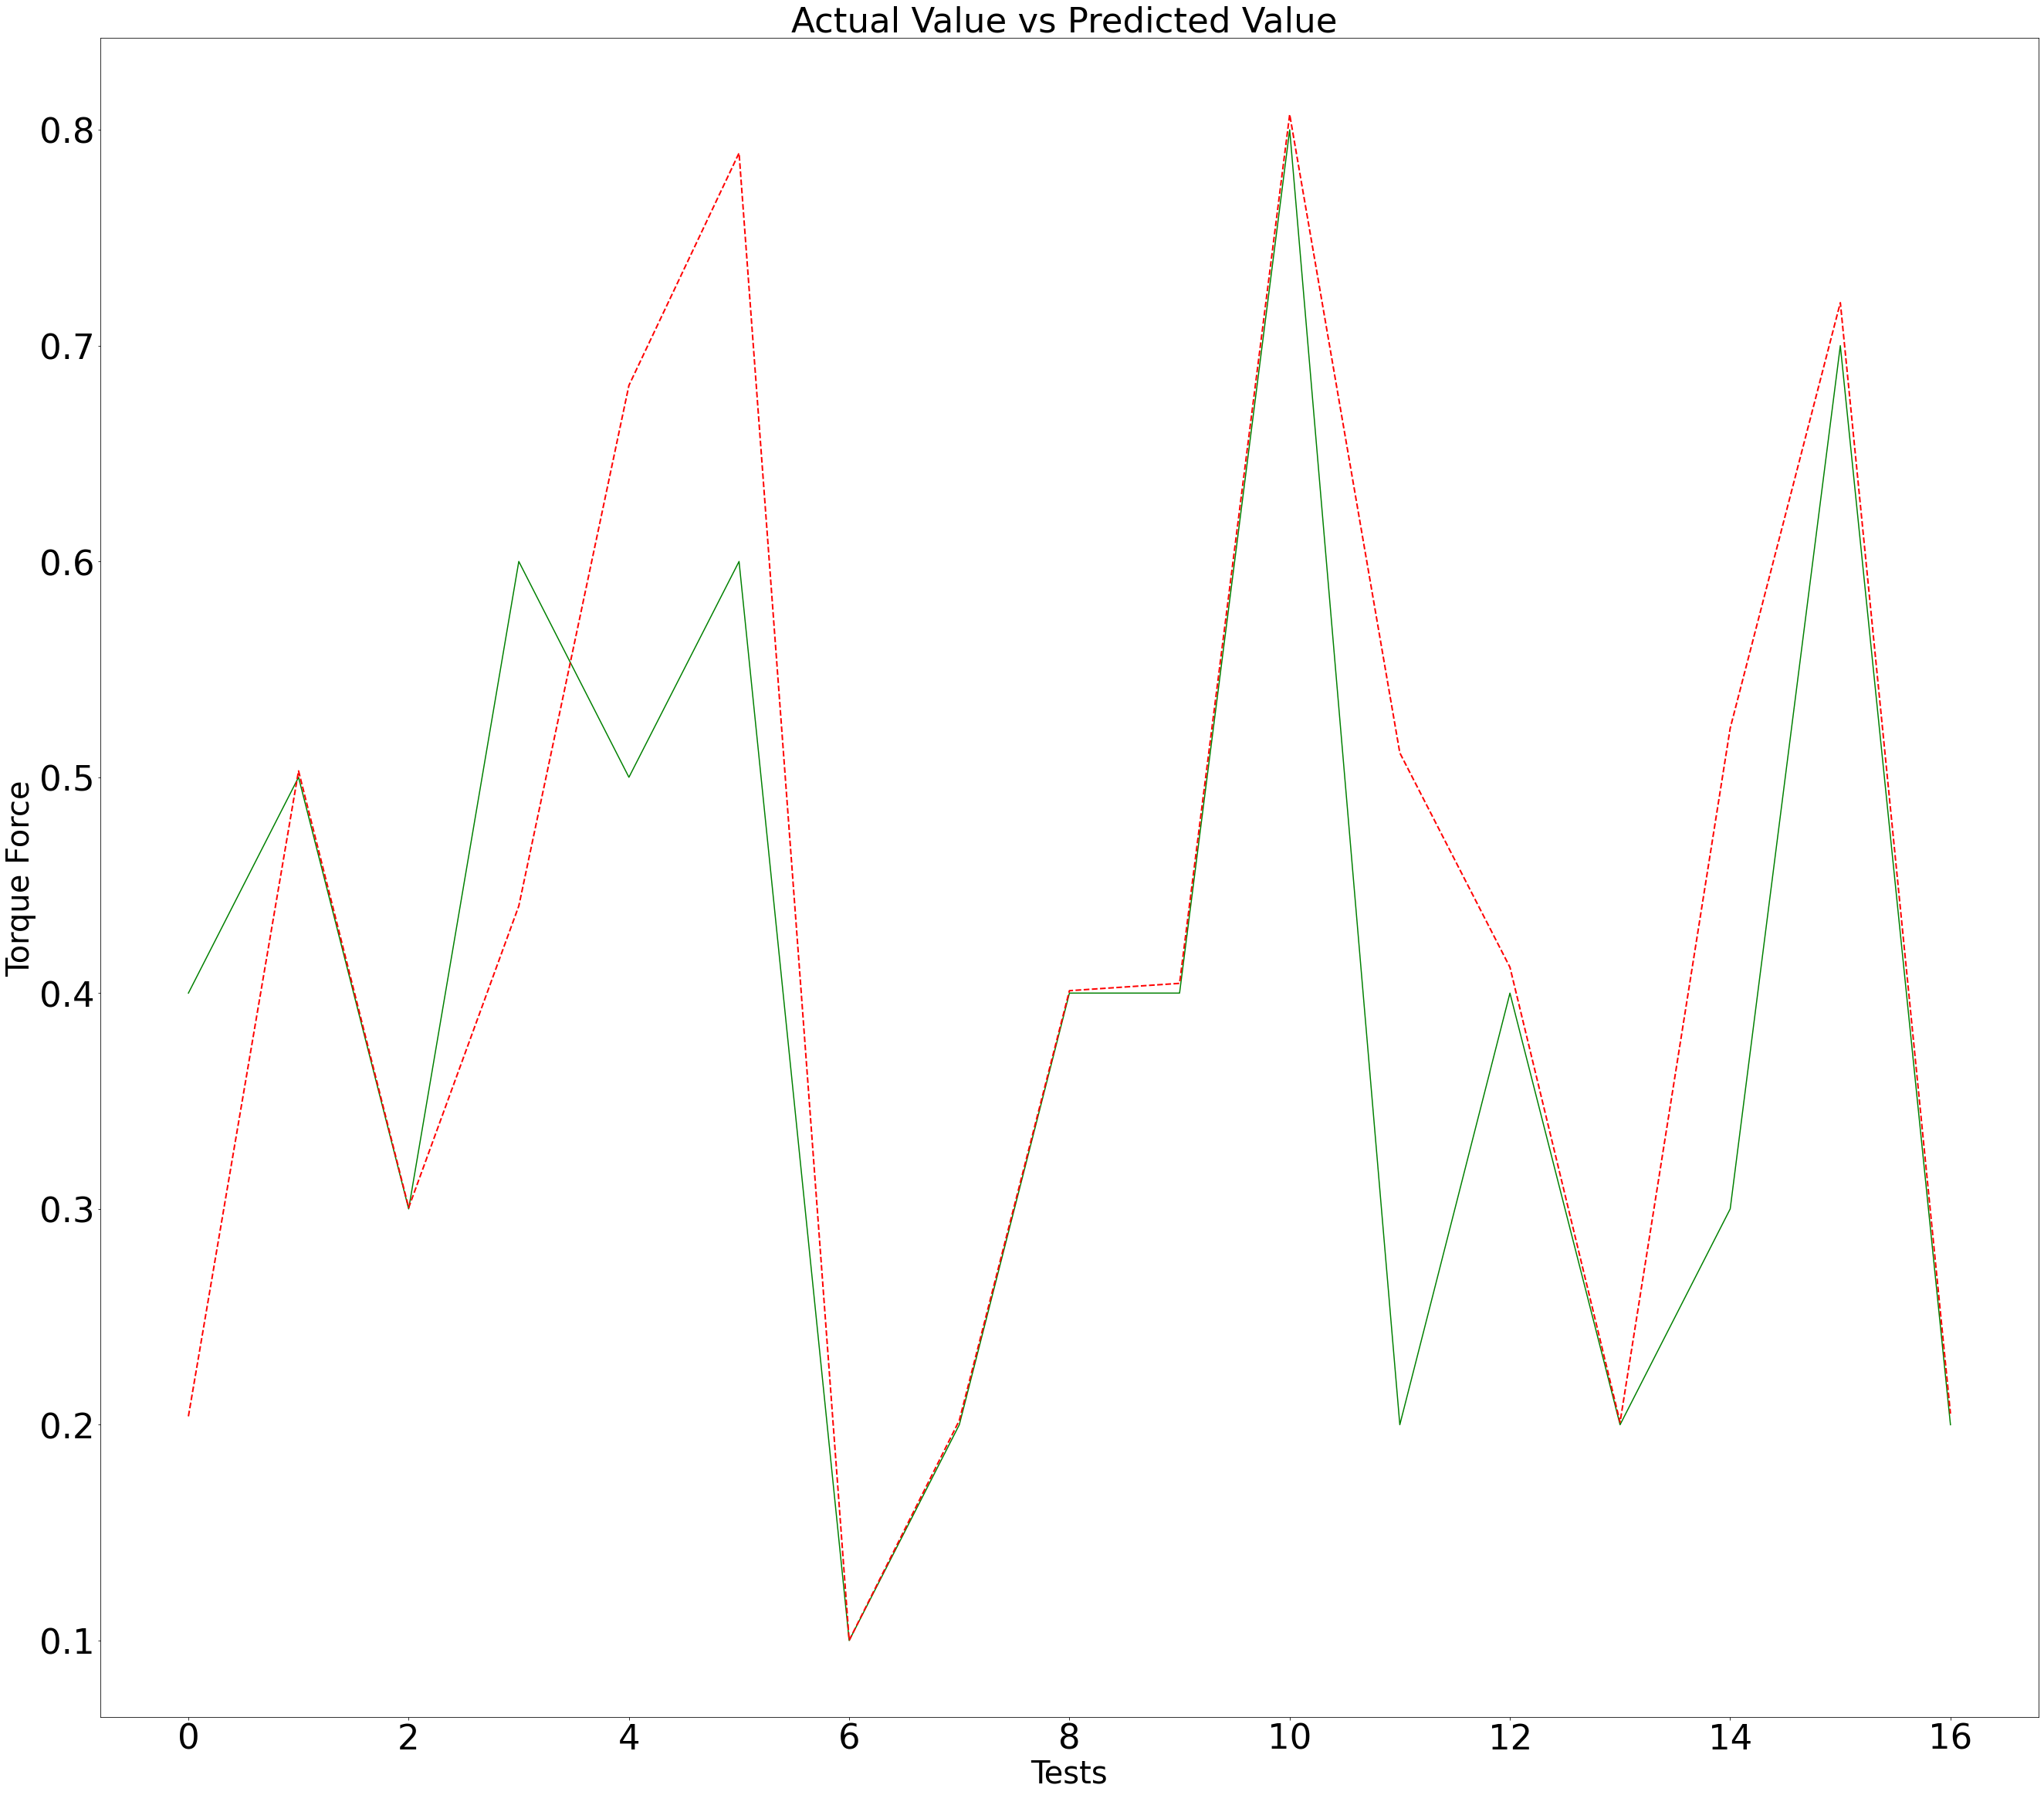

In [ ]:

Y=list(Y)
y_pred=list(y_pred)
import numpy as np
y_p=np.asarray(y_pred)
y_pr = pd.DataFrame(y_p)
y_s = pd.DataFrame(Y)
y_s.to_csv("S1.csv", header=['Act'])
y_pr.to_csv("S2.csv", header=['Prd'])
df1= pd.read_csv("S1.csv", index_col=0)
df2= pd.read_csv("S2.csv", index_col=0)
merge_csv = pd.concat((df1, df2), axis=1)
merge_csv.to_csv("Torque_PredictionFromTestingData.csv")

sf = pd.read_csv("Torque_PredictionFromTestingData.csv", index_col=0)
realVals = sf.Act
predictedVals =  sf.Prd
mse = mean_squared_error(realVals, predictedVals)
print(mse)
plt.figure(figsize=(45,40))
plt.plot(realVals, color="green")
plt.plot(predictedVals,  '--', linewidth=2, markersize=12, color="red")
plt.title('Actual Value vs Predicted Value ')
plt.xlabel('Tests' , fontsize=40 )
plt.ylabel('Torque Force' , fontsize=40 )
plt.savefig('Torque_PredictionFromTestingData.jpg', dpi=100)

In [ ]:
df = pd.read_excel("DSVal.xlsx", index_col=0)
dataset = df.values
X = dataset[:,1:4]
y_pred = model.predict(X)

In [ ]:
Y=list(X)
y_pred=list(y_pred)
import numpy as np
y_p=np.asarray(y_pred)
y_pr = pd.DataFrame(y_p)
y_s = pd.DataFrame(Y)
y_s.to_csv("S1.csv", header=['A', 'B', 'C'])
y_pr.to_csv("S2.csv", header=['Prd'])
df1= pd.read_csv("S1.csv", index_col=0)
df2= pd.read_csv("S2.csv", index_col=0)
merge_csv = pd.concat((df1, df2), axis=1)
merge_csv.to_csv("Torque_PredictionValidationUnseendataforPrediction.csv") 